# Assignment 1.c Neural Networks

This notebok is an implementation of Neural Networks from scarth without using any frameworks.MNIST fashion dataset is used.Additionally, the same model was implemented using Scikit-learn.


### Loading and plotting data

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [ ]:
# load fashion_mnist dataset from Keras
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
num_of_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255.0
x_test  /=255.0





# print(x_train[0,:112])
# print(y_train.shape)


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# print shapes of train and test datasets
print('X-train_shape: ', x_train.shape)
print('y-train_shape: ', y_train.shape)
print('X-test_shape:  ', x_test.shape)
print('y-test_shape:  ', y_test.shape)


X-train_shape:  (60000, 28, 28)
y-train_shape:  (60000,)
X-test_shape:   (10000, 28, 28)
y-test_shape:   (10000,)


### Visualizing subset of the training set

In [ ]:
# create a list of names for each class.The names are 
# T-shirt/top, Trouser, Pullover, Dres, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot 

names_of_classes = ['T-shirt/top','Trouser','Pullover','Dres','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 


In [ ]:
# print class name and number of data for each class
num_of_data_for_class = [0,0,0,0,0,0,0,0,0,0]
# print(len(y_train))

for i in range(0,60000):
  num_of_data_for_class[y_train[i]-1]+=1

for i in range(0,10):
    print(names_of_classes[i], num_of_data_for_class[i])
    print(i)
  
     


T-shirt/top 6000
0
Trouser 6000
1
Pullover 6000
2
Dres 6000
3
Coat 6000
4
Sandal 6000
5
Shirt 6000
6
Sneaker 6000
7
Bag 6000
8
Ankle boot 6000
9


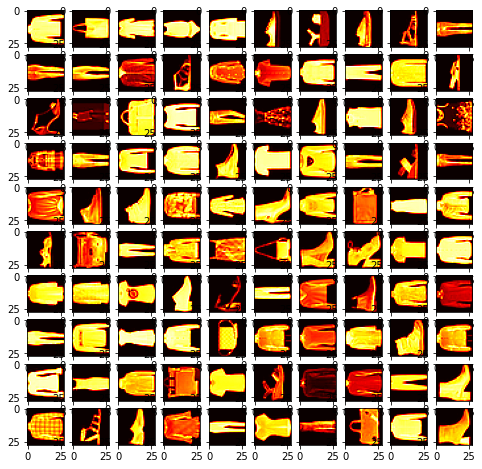

In [ ]:
# plot images 10*10 images with their class names
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x_train[np.random.randint(0,5001),:].reshape(28,28,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        # axis[i,j].axis("off")


### Compute the Neural Networks cost function

$J(\Theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^k [-y_k^{(i)} log(h_\Theta(x^{(i)})_k) - ( 1 -y_k^{(i)} log (1-h_\Theta(x^{(i)})_k)] + \frac{\lambda}{2m}[\sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2]$

In [ ]:
# Implement sigmoid function
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [ ]:
# Implement gradient of sigmoid function

def sigmoidGradient(z):
  
    sigmoid = 1/(1 + np.exp(-z))

    return sigmoid *(1-sigmoid)



In [ ]:
def nnCostFunction__(X, y,nn_params,input_layer_size,hidden_layer_size,num_labels,Lambda):

    Theta1 = nn_params[:((hidden_layer_size)*(input_layer_size+1))].reshape(input_layer_size+1,hidden_layer_size)
    Theta2 = nn_params[((input_layer_size+1)*(hidden_layer_size)):].reshape(hidden_layer_size+1,num_labels)

    
    m = X.shape[0]
    J=0
    # X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2) # output layer
    
    for i in range(num_labels):
        y10[:,i][:,np.newaxis] = np.where(y==i,1,0)
    # for i in range(0,m):
    #     y10[i,(y[i,0])] = 1
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1.T[:,1:]**2) + np.sum(Theta2.T[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros(((Theta1.T).shape))
    grad2 = np.zeros(((Theta2.T).shape))
    
    for i in range(m):
        xi= X[i,:] # 1 X 401
        a1i = a1[i,:] # 1 X 26
        a2i =a2[i,:] # 1 X 10
        d3 = a2i - y10[i,:] #by convention of coursere d3
        d2 = Theta2 @ d3.T * sigmoidGradient(np.hstack((1,xi @ Theta1)))
        grad1 = grad1 + d2[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d3.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.T.shape[0],1)),Theta1.T[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.T.shape[0],1)),Theta2.T[:,1:]))
     
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

### Random initialization

Select values for $\Theta^{(l)}$ uniformly in the range $[-\epsilon_{init} , \epsilon_{init}]$

One effective strategy for choosing $\epsilon_{init}$ is to base it on the number of units in the network

$\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$

In [ ]:
# Implement random initilization funnction
def randInitializeWeights_2dim(row, column):

    epi = (6**1/2) / (row + column)**1/2

    W = np.random.rand(row,column) *(2*epi) -epi


    return W  


In [ ]:
# initlize neural network parameters (theta)
input_layer_size = 784
hidden_layer_size = 25
num_labels = 10
theta1 = randInitializeWeights_2dim(input_layer_size+1, hidden_layer_size)
theta2 = randInitializeWeights_2dim(hidden_layer_size+1, num_labels)
nn_params = np.append(theta1.flatten(), theta2.flatten())

### Learning parameters using Gradient Descent

In [ ]:
# Implement gradient descent function for Neural Networks
def gradientDescentnn(X,y,nn_params,input_layer_size,hidden_layer_size,alpha,num_iters,num_labels,Lambda):

  J_history = []


  Theta1 = nn_params[:((hidden_layer_size)*(input_layer_size+1))].reshape(input_layer_size+1,hidden_layer_size)
  Theta2 = nn_params[((input_layer_size+1)*(hidden_layer_size)):].reshape(hidden_layer_size+1,num_labels)

  
  for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction__(X, y,nn_params,input_layer_size,hidden_layer_size,num_labels,Lambda)[3:]
        Theta1 = Theta1.T
        Theta2 = Theta2.T
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        Theta1 = Theta1.T
        Theta2 = Theta2.T
        J_history.append(cost)

  nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
  return nn_paramsFinal , J_history



In [ ]:
#Normalize your dataset and prepare for training
l = len(x_train)
print(l)
x_train = np.hstack((np.ones((l,1)),x_train))
print(x_train.shape)
y_train = y_train[:,np.newaxis]
print(y_train.shape)


l = len(x_test)
print(l)
x_test = np.hstack((np.ones((l,1)),x_test))
print(x_test.shape)
y_test = y_test[:,np.newaxis]
print(y_test.shape)

60000
(60000, 785)
(60000, 1)
10000
(10000, 785)
(10000, 1)


In [ ]:
# train the model
nnTheta, nnJ_history = gradientDescentnn(x_train, y_train, nn_params, input_layer_size, hidden_layer_size,0.8,500, num_labels,1)

In [ ]:
print(nnJ_history)

[6.859684898666707, 3.2781678938303482, 3.342141292418471, 3.50845931849143, 3.3935648314324247, 3.3400151225188575, 3.235751562245997, 3.21808056511843, 3.2067108724705378, 3.1954552467675903, 3.1822996670200663, 3.1664546258811, 3.14726556437384, 3.124166703473653, 3.0967515154327154, 3.0649005895521872, 3.028922366908248, 2.9896214919486113, 2.9482054207896455, 2.9060338584772216, 2.864329938016981, 2.823980519738339, 2.7854765690558203, 2.7489632966920974, 2.7143468840811895, 2.6814072276370484, 2.6498860357272123, 2.6195398490132513, 2.5901638910079594, 2.561599786554853, 2.5337379134618576, 2.5065169950761033, 2.4799184990697674, 2.453954859685885, 2.428654255953659, 2.4040458560020954, 2.3801486834736263, 2.356966227042612, 2.3344869996742164, 2.312689072006553, 2.2915456884030894, 2.271029496573741, 2.2511141643545765, 2.2317738294723606, 2.2129820289473656, 2.1947115660210104, 2.1769355593934545, 2.159628948017422, 2.1427696180414495, 2.1263387440396215, 2.1103203913873014, 2.

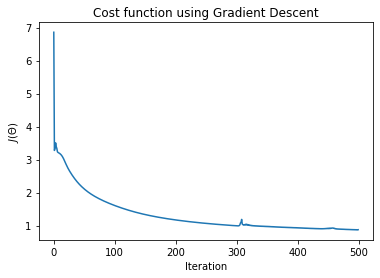

In [ ]:
#plot cost function
# print(nnTheta.shape)
plt.plot(nnJ_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()


In [ ]:
# implement predict function
def predict(X,theta1,theta2):

  a1 = sigmoid(X@theta1)
  a1 = np.hstack((np.ones((X.shape[0],1)), a1))

  a2 = sigmoid(a1 @theta2)

  return np.argmax(a2,axis = 1)


In [ ]:

theta1 = nnTheta[:((input_layer_size+1)*(hidden_layer_size))].reshape(input_layer_size+1, hidden_layer_size)
theta2 = nnTheta[((input_layer_size+1)*(hidden_layer_size)):].reshape(hidden_layer_size+1,num_labels)
p_train = predict(x_train,theta1,theta2)
print("Training Set Accuracy:",(sum(p_train[:,np.newaxis]==y_train)/len(y_train)*100)[0],"%")
p_test = predict(x_test,theta1,theta2)
print("Testing Set Accuracy:",(sum(p_test[:,np.newaxis]==y_test)/len(y_test)*100)[0],"%")

Training Set Accuracy: 83.145 %
Testing Set Accuracy: 81.89999999999999 %


## Using Scikitlearn or Keras
Use Scikitlearn or Keras to train a Neural Network model for the given dataset. Provide your accuracy and loss values. 
<p>
You can use as many cells as you want.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
# the data, split between train and test sets
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
num_of_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255.0
x_test  /=255.0
y_train = keras.utils.to_categorical(y_train, num_of_classes)
y_test = keras.utils.to_categorical(y_test, num_of_classes)
print(y_train.shape)

(60000, 10)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=800, alpha=1e-7,
                    solver='sgd', verbose=True, tol=1e-4, random_state=1,
                    learning_rate_init=0.01)
mlp.fit(x_train.reshape(60000,784),y_train)
print("Training set score: %f"% mlp.score(x_train.reshape(60000,784),y_train))
print("Test set score: %f"% mlp.score(x_test.reshape(10000,784),y_test))

Iteration 1, loss = 1.48722632
Iteration 2, loss = 0.98432813
Iteration 3, loss = 0.88663058
Iteration 4, loss = 0.83466292
Iteration 5, loss = 0.80275060
Iteration 6, loss = 0.77784402
Iteration 7, loss = 0.76074716
Iteration 8, loss = 0.74802767
Iteration 9, loss = 0.73616192
Iteration 10, loss = 0.72623443
Iteration 11, loss = 0.71833837
Iteration 12, loss = 0.70960705
Iteration 13, loss = 0.70350647
Iteration 14, loss = 0.69749398
Iteration 15, loss = 0.69143860
Iteration 16, loss = 0.68645791
Iteration 17, loss = 0.68160767
Iteration 18, loss = 0.67759435
Iteration 19, loss = 0.67197389
Iteration 20, loss = 0.66759204
Iteration 21, loss = 0.66527613
Iteration 22, loss = 0.66114463
Iteration 23, loss = 0.65592907
Iteration 24, loss = 0.65339001
Iteration 25, loss = 0.65009428
Iteration 26, loss = 0.64618250
Iteration 27, loss = 0.64254386
Iteration 28, loss = 0.64086914
Iteration 29, loss = 0.63716591
Iteration 30, loss = 0.63431766
Iteration 31, loss = 0.63086697
Iteration 32, los

In [ ]:
y_test[0:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
mlp.predict(x_test[0:10,:].reshape(10,28*28))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])